In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score,auc,roc_curve

In [5]:
#Import dữ liệu đã được tiền xử lý
df = pd.read_csv('../../../BankChurners_Preprocessing.csv')

## Chọn Attrition_Flag làm thuộc tính quyết định. Nhưng vì Attrition_Flag đang bị mất cân bằng dữ liệu. Vậy nên ta cần xử lí mất cân bằng trước

Tách dữ liệu thành 2 phần. 1 phần chứa các cột còn lại và cột chứa thuộc tính quyết định.
features: Chứa các thuộc tính còn lại.
labels: Chứa thuộc tính quyết định.

In [6]:
features=df.drop('Attrition_Flag',axis=1)
labels=df['Attrition_Flag']

Chuyển đổi các cột không phải dạng số trong biến features về dạng one-hot vector

In [7]:
features_onehot=pd.get_dummies(features,columns=features.select_dtypes(exclude=['int64']).columns)

In [8]:
#Chia tập dữ liệu theo train 80%, test 20%
X_train, X_test, y_train, y_test = train_test_split(features_onehot, labels, test_size=0.2, random_state=42,shuffle=True)

In [9]:
# Áp dụng kỹ thuật Oversampling để làm cân bằng dữ liệu
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [11]:
print(y_train_resampled.shape)
print(X_train_resampled.shape)

(13602,)
(13602, 21)


In [12]:
crf = RandomForestClassifier(random_state=0)

In [13]:
crf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=0)

In [14]:
rf_pred = crf.predict(X_test)
rf_score=metrics.accuracy_score(y_test,rf_pred)
print("Accuracy:",rf_score)
print("Report:",metrics.classification_report(y_test,rf_pred))

Accuracy: 0.9378084896347483
Report:               precision    recall  f1-score   support

           0       0.83      0.78      0.80       327
           1       0.96      0.97      0.96      1699

    accuracy                           0.94      2026
   macro avg       0.89      0.87      0.88      2026
weighted avg       0.94      0.94      0.94      2026



Text(0.5, 1.0, 'Random Forest Accuracy Score : 0.9378084896347483')

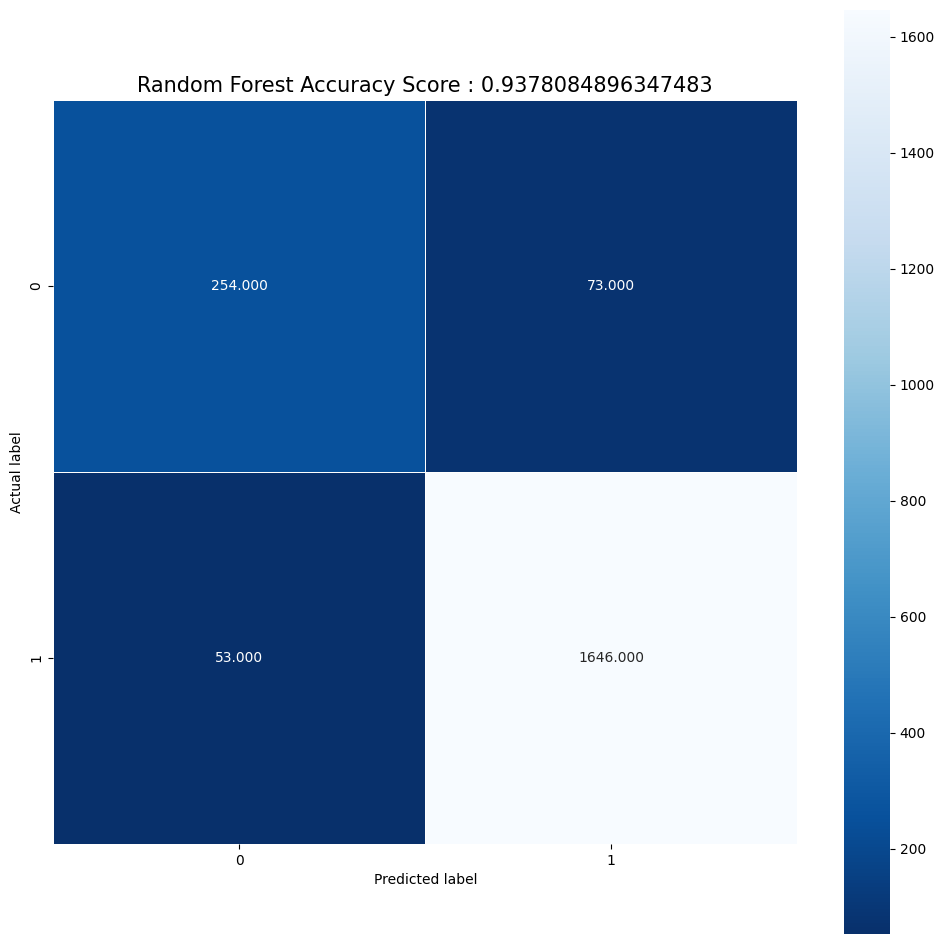

In [15]:
rf_cm=metrics.confusion_matrix(y_test,rf_pred)
plt.figure(figsize=(12,12))
sns.heatmap(rf_cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap="Blues_r")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Random Forest Accuracy Score : {0}'.format(rf_score)
plt.title(title,size=15)

TÍNH ROC AUC

In [16]:
# Dự đoán xác suất cho dữ liệu kiểm tra
y_true=y_test
y_probas = crf.predict_proba(X_test)[:,1]

In [17]:
# Tính đường cong ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probas)
roc_auc = auc(fpr, tpr)

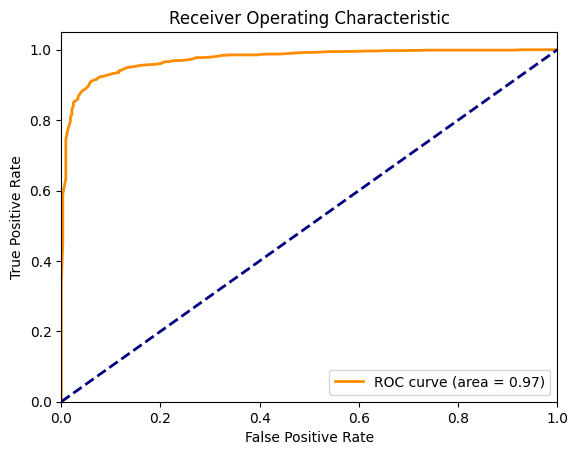

In [18]:
# Vẽ đường cong ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

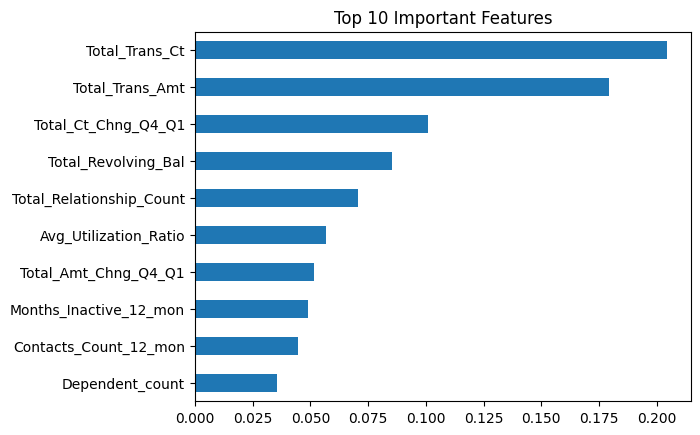

In [19]:
feat_importances = pd.Series(crf.feature_importances_, index=X_train_resampled.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()